In [1]:
from plotbee.video import Video
from plotbee.body import Body
import plotbee.videoplotter as vplt
import glob
import os
from ipywidgets import interact
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 20]


VIDEO_FORMAT="/mnt/storage/Gurabo/datasets/gurabo10/mp4/col02/{}.mp4"
SKELETON_FORMAT = "/mnt/storage/work/jchan/col02_2019/hungarian_tag_{}_skeleton.json"
SKELETON_PATTERN = "/mnt/storage/work/jchan/col02_2019/*.json"

MODEL_PATH = "mobilenet_pollen90x90.tf"

def get_videoname(file):
    _, filename = os.path.split(file)
    return filename[14:-14]

def fix_skeleton(video):
    for frame in video:
        for body in frame:
            if (2 in body._parts) and (3 in body._parts):
                body._center_part = 2
                body._angle_conn= [2, 3]
    return video

skeleton_files = glob.glob(SKELETON_PATTERN)
videos = [get_videoname(sk) for sk in skeleton_files]

### Load Video

In [2]:
VIDEO=None

@interact
def load_video(video_name=videos, load=False):
    global VIDEO
    if load:
        print("Loading video data...")
        print("Please do not change the video until this widget shows the video.")
        VIDEO = Video.load(SKELETON_FORMAT.format(video_name))
        VIDEO = fix_skeleton(VIDEO)
        VIDEO.load_video(VIDEO_FORMAT.format(video_name))
        vplt.imshow(VIDEO[0])

interactive(children=(Dropdown(description='video_name', options=('31_02_R_190720110000', '107_02_R_1908101100…

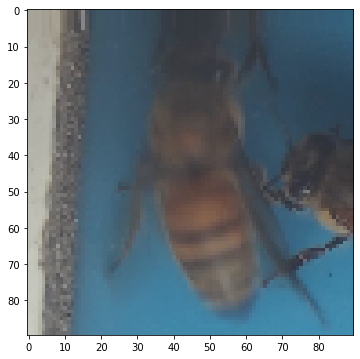

In [5]:
Body.scale = 1.6

Body.width = 360
Body.height = 360

Body.out_width = 90
Body.out_height = 90

plt.figure(figsize=(6, 6))
vplt.imshow(VIDEO[0][0])

### Pollen Processing

In the command line:
```
pb pollen --file <skeleton_file> --video <video_file> --model <model_path> --workers <n_workers>

```

In [3]:
#Todo:  scale=1.6
VIDEO.process_pollen(MODEL_PATH, scale=1.6)

100%|██████████| 17995/17995 [00:00<00:00, 35150.51it/s]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')][PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]  11
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
 0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 0


 16%|█▋        | 2932/17995 [00:00<00:00, 15159.05it/s]5 [00:00<?, ?it/s]2.45it/s] 

Something wrong with the video.


100%|██████████| 71980/71980 [00:07<00:00, 9621.14it/s] 


### Visualize some Pollen Predictions

In [7]:
Body.width = 360
Body.height = 360
Body.scale = 1.6

Body.out_width = 90
Body.out_height = 90

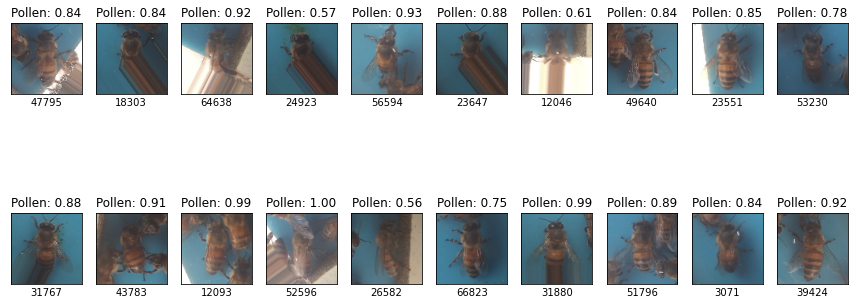

In [9]:
from random import shuffle

pollen_bees = list()

for frame in VIDEO:
    for body in frame:
        if body.pollen:
            pollen_bees.append(body)
            
shuffle(pollen_bees)
vplt.contact_sheet(pollen_bees[:20])

### Export Dataset

In the command line:
```
pb export --pollen --output_folder <output_foldes> --file <skeleton_file> --width <image_width> --height <image_height> --size <limit_size>

```

In [10]:
Body.width = 360
Body.height = 360
Body.scale = 1.6

Body.out_width = 90
Body.out_height = 90

VIDEO.export_pollen("output_folder", limit=200)

  0%|          | 0/200 [00:00<?, ?it/s]

31_02_R_190720110000


100%|██████████| 200/200 [01:18<00:00,  2.56it/s]
